In [6]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
file = pd.read_csv("Data/fifa21_train.csv")

In [162]:
#display(file)

In [16]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11701 entries, 0 to 11700
Columns: 101 entries, ID to OVA
dtypes: float64(10), int64(43), object(48)
memory usage: 9.0+ MB


In [20]:
# display(file['Club'].unique())
display(file['Club'].value_counts())

display(file['Club'].value_counts(dropna=False))
len(file[file['Club'].isna()==True])

OGC Nice                35
Crystal Palace          35
Everton                 35
Sporting CP             33
Chelsea                 33
                        ..
Kardemir Karabükspor     1
Itagüí Leones FC         1
Guizhou Hengfeng FC      1
Jaguares de Chiapas      1
Atlético Huila           1
Name: Club, Length: 885, dtype: int64

Crystal Palace          35
OGC Nice                35
Everton                 35
Chelsea                 33
Sporting CP             33
                        ..
Kardemir Karabükspor     1
Itagüí Leones FC         1
Guizhou Hengfeng FC      1
Halmstads BK             1
Atlético Huila           1
Name: Club, Length: 886, dtype: int64

18

In [21]:
display(file.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position',
       'Team & Contract', 'Height', 'Weight',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA'],
      dtype='object', length=101)

In [25]:
file_categorical = file.select_dtypes(object)

In [163]:
#display(file_categorical)

In [27]:
display(file_categorical.columns)

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='object')

In [28]:
file_numerical = file.select_dtypes(np.number)

In [164]:
#display(file_numerical)

In [30]:
display(file_categorical.isna().sum())

Name                   0
Nationality            0
Club                  18
BP                     0
Position             288
Team & Contract        0
Height                 0
Weight                 0
foot                   0
Joined                41
Loan Date End      11072
Value                  0
Wage                   0
Release Clause         0
Contract               0
W/F                    0
SM                     0
A/W                   59
D/W                   59
IR                     0
Hits                   0
LS                     0
ST                     0
RS                     0
LW                     0
LF                     0
CF                     0
RF                     0
RW                     0
LAM                    0
CAM                    0
RAM                    0
LM                     0
LCM                    0
CM                     0
RCM                    0
RM                     0
LWB                    0
LDM                    0
CDM                    0


In [31]:
display(file_numerical.isna().sum())

ID                    0
Age                   0
Growth                0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              41
Skill                 0
Dribbling             0
Curve                41
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              41
Reactions             0
Balance              41
Power                 0
Shot Power            0
Jumping              41
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         7
Positioning           7
Vision               41
Penalties             0
Composure           279
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle       41
Goalkeeping           0
GK Diving             0
GK Handling           0
GK Kicking      

In [65]:
display(file[(file["Volleys"].isna() == False) & (file["Curve"].isna() == False) & (file["Agility"].isna() == False)])

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,I. Ávila,29,Peru,Melgar FBC,ST,ST,Melgar FBC 2019 ~ 2021,"5'7""",154lbs,...,45+2,45+2,46+2,44+2,43+2,43+2,43+2,44+2,19+2,65
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67


## Here we created a new DF where we kicked out some rows with many NaN

In [64]:
df_new = file[(file["Volleys"].isna() == False) & (file["Curve"].isna() == False) & (file["Agility"].isna() == False)]

In [165]:
#display(df_new)

In [69]:
display(df_new.isna().sum())

ID              0
Name            0
Age             0
Nationality     0
Club           14
               ..
CB              0
RCB             0
RB              0
GK              0
OVA             0
Length: 101, dtype: int64

In [71]:
# Numerical DataFrame
df_new_numerical = df_new.select_dtypes(np.number)

In [88]:
df_new_numerical.isna().sum()

ID                  0
Age                 0
Growth              0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
Total Stats         0
Base Stats

In [85]:
mean_composure = df_new_numerical["Composure"].mean()

In [79]:
df_new_numerical["Composure"].describe()

count    11422.000000
mean        59.947732
std         11.769872
min         12.000000
25%         53.000000
50%         61.000000
75%         68.000000
max         96.000000
Name: Composure, dtype: float64

In [86]:
df_new_numerical["Composure"] = df_new_numerical["Composure"].fillna(mean_composure)

<ipython-input-86-2b8380a39fac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_numerical["Composure"] = df_new_numerical["Composure"].fillna(mean)


In [150]:
# Categorical Dataframe
df_new_categorical = df_new.select_dtypes(object)

In [172]:
df_new_categorical.isna().sum()

Name                   0
Nationality            0
Club                  14
BP                     0
Position               0
Team & Contract        0
Height                 0
Weight                 0
foot                   0
Joined                 0
Loan Date End      11031
Value                  0
Wage                   0
Release Clause         0
Contract               0
W/F                    0
SM                     0
A/W                   18
D/W                   18
IR                     0
Hits                   0
LS                     0
ST                     0
RS                     0
LW                     0
LF                     0
CF                     0
RF                     0
RW                     0
LAM                    0
CAM                    0
RAM                    0
LM                     0
LCM                    0
CM                     0
RCM                    0
RM                     0
LWB                    0
LDM                    0
CDM                    0


In [160]:
#df_new_categorical["Position"].unique()

In [153]:
df_new_categorical["Club"].value_counts(dropna=False)

OGC Nice                 35
Crystal Palace           35
Everton                  35
Sporting CP              33
Chelsea                  32
                         ..
Longford Town             1
LKS Lodz                  1
Spain                     1
FC Ural Yekaterinburg     1
Atlante                   1
Name: Club, Length: 880, dtype: int64

In [154]:
len(df_new_categorical["Club"])

11660

In [171]:
#df_new_categorical["Club"].unique()

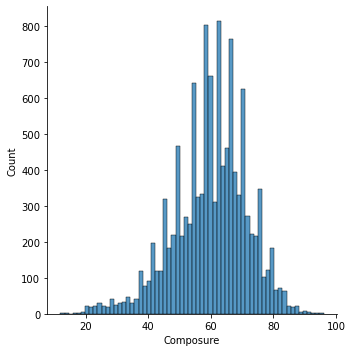

In [156]:
sns.displot(df_new_numerical["Composure"])
plt.show()

In [157]:
Position=pd.DataFrame(df_new_categorical['Position'].value_counts())
display(Position)

,Position
CB,1347
ST,1260
GK,1038
CDM CM,515
CM,446
...,...
RW LWB RM,1
LM RWB RM,1
ST CF RM,1
LW CF ST,1


In [147]:
pos = np.array(["CB", "ST", "GK"])

In [159]:
#df_new_categorical["Position"].unique()
#np.random.choice(df_new_categorical["Position"].unique(),size=2)
list_position_na = list(df_new_categorical[df_new_categorical["Position"].isna() == True].index)
#list_position_na
#df_new_categorical.loc[list_position_na,["Position"]]
df_new_categorical.loc[list_position_na,["Position"]] = np.random.choice(pos ,size=len(list_position_na)).reshape((-1,1))

#repl = np.random.choice(pos ,size=len(list_position_na))
#display(repl)
#display(lenay(list_position_na)
#df_new_categorical.loc[list_position_na,["Position"]] = repl
df_new_categorical.loc[list_position_na,['Position']].head()
#np.random.choice(df_new_categorical["Position"],size=len(list_position_na)).reshape((-1,1)).shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-159-d18632b0f701>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_categorical.loc[list_position_na,["Position"]] = np.random.choice(pos ,size=len(list_position_na)).reshape((-1,1))


,Position
17,GK
59,CB
132,GK
157,CB
214,CB


In [170]:
Club=pd.DataFrame(df_new_categorical['Club'].value_counts())
display(Club)
Club.info()

,Club
OGC Nice,35
Crystal Palace,35
Everton,35
Sporting CP,33
Fenerbahçe SK,32
...,...
Al Qadisiyah,1
Tours FC,1
Alianza Petrolera,1
Albirex Niigata,1


<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, OGC Nice to Atlético Huila
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Club    879 non-null    int64
dtypes: int64(1)
memory usage: 13.7+ KB


In [173]:
Club=pd.DataFrame(df_new_categorical['A/W'].value_counts())
display(Club)
Club.info()

,A/W
Medium,7494
High,3548
Low,600


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Medium to Low
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A/W     3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [176]:
Club=pd.DataFrame(df_new_categorical['D/W'].value_counts())
display(Club)
Club.info()

,D/W
Medium,8350
High,2027
Low,1265


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Medium to Low
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D/W     3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [193]:
df_new_categorical.isna().sum()

Name               0
Nationality        0
Club               0
BP                 0
Position           0
Team & Contract    0
Height             0
Weight             0
foot               0
Joined             0
Value              0
Wage               0
Release Clause     0
Contract           0
W/F                0
SM                 0
A/W                0
D/W                0
IR                 0
Hits               0
LS                 0
ST                 0
RS                 0
LW                 0
LF                 0
CF                 0
RF                 0
RW                 0
LAM                0
CAM                0
RAM                0
LM                 0
LCM                0
CM                 0
RCM                0
RM                 0
LWB                0
LDM                0
CDM                0
RDM                0
RWB                0
LB                 0
LCB                0
CB                 0
RCB                0
RB                 0
GK                 0
dtype: int64

In [179]:
df_new_categorical["D/W"] = df_new_categorical["D/W"].fillna("Medium")

<ipython-input-179-f585d3f8b976>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_categorical["D/W"] = df_new_categorical["D/W"].fillna("Medium")


In [182]:
df_new_categorical["A/W"] = df_new_categorical["A/W"].fillna("Medium")

<ipython-input-182-660eae0e4cc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_categorical["A/W"] = df_new_categorical["A/W"].fillna("Medium")


In [189]:
#df_new_categorical["Position"].unique()
#np.random.choice(df_new_categorical["Position"].unique(),size=2)
list_club_na = list(df_new_categorical[df_new_categorical["Club"].isna() == True].index)
#list_position_na
#df_new_categorical.loc[list_position_na,["Position"]]
df_new_categorical.loc[list_club_na,["Club"]] = np.random.choice(df_new_categorical["Club"] ,size=len(list_club_na)).reshape((-1,1))

#repl = np.random.choice(pos ,size=len(list_position_na))
#display(repl)
#display(lenay(list_position_na)
#df_new_categorical.loc[list_position_na,["Position"]] = repl
#df_new_categorical.loc[list_position_na,['Position']].head()
#np.random.choice(df_new_categorical["Position"],size=len(list_position_na)).reshape((-1,1)).shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-189-df905454af30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_categorical.loc[list_club_na,["Club"]] = np.random.choice(df_new_categorical["Club"] ,size=len(list_club_na)).reshape((-1,1))


In [191]:
Club=pd.DataFrame(df_new_categorical['Loan Date End'].value_counts())
display(Club)
Club.info()

,Loan Date End
"Jun 30, 2021",370
"Jun 30, 2020",72
"Dec 31, 2020",55
"Jun 30, 2019",19
"Jun 30, 2018",17
"May 31, 2021",15
"Dec 31, 2021",12
"Jan 31, 2021",11
"Jun 30, 2022",8
"Jan 1, 2021",7


<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Jun 30, 2021 to Dec 30, 2021
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Loan Date End  34 non-null     int64
dtypes: int64(1)
memory usage: 544.0+ bytes


In [192]:
df_new_categorical = df_new_categorical.drop(columns=["Loan Date End"])

In [199]:
df_new_categorical.columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Joined', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK'],
      dtype='object')

In [197]:
#df_new_numerical.columns

In [ ]:
df_new_categorical.rename(columns={})

In [196]:
# renaming columns
 #en_cat_ord= en_cat_ord.rename(columns={0:'Coverage',
                                       1:'Education',
                                       2:'Policy Type',
                                       3:'Policy',
                                       4:'Renew Offer Type',
                                       5:'Vehicle Class',
                                       6:'Vehicle Size'})

#display(en_cat_ord.head(5))


IndentationError: unexpected indent (<ipython-input-196-5abf7f5849d7>, line 3)